In [1]:
import numpy as np
import pandas as pd
import warnings
import model_search

from xgboost import plot_importance
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

warnings.filterwarnings(action="ignore")

c:\Users\kiril\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Загрузка данных
full_df = pd.read_csv('../data/real_ds_1.csv')
columns = [*full_df]

# Преобразование в массивы
x_full = np.array(full_df[columns[:-1]].values.tolist())
y_full = np.array(full_df[columns[-1]].values.tolist()).reshape([-1, 1])

# Разделение на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x_full, y_full, test_size=0.9, shuffle=True, randomseed=42)

# Нормализация
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_full_scaled = scaler.transform(x_full)

In [3]:
# Классы моделей
model_classes = ['HistGradientBoostingRegressor', 'XGBRegressor', 'KNeighborsRegressor',
                'SVR', 'KernelRidge',
                'GradientBoostingRegressor', 'ExtraTreesRegressor', 'GaussianProcessRegressor',
                'RandomForestRegressor', 'CatBoostRegressor', 'Ridge', 'ElasticNet', 'LinearRegression',
                'SGDRegressor', 'Lasso', 'LassoLars', 'ARDRegression', 'BayesianRidge']

# Гиперпараметрический поиск и оценка моделей
OS = model_search.OptunaSearchCV(model_classes, compare_kfold=False)
OS.fit(x_train_scaled, y_train, x_full_scaled, y_full, ['loo'], n_trials=60, n_startup_trials=20)


HistGradientBoostingRegressor hyperoptimization
loo cross-validation


Best trial: 48. Best value: 0.725239: 100%|██████████| 60/60 [01:16<00:00,  1.28s/it]



XGBRegressor hyperoptimization
loo cross-validation


Best trial: 25. Best value: 0.720178: 100%|██████████| 60/60 [00:12<00:00,  4.81it/s]



KNeighborsRegressor hyperoptimization
loo cross-validation


Best trial: 23. Best value: 0.53889: 100%|██████████| 60/60 [00:02<00:00, 29.66it/s] 



SVR hyperoptimization
loo cross-validation


Best trial: 59. Best value: 0.726548: 100%|██████████| 60/60 [00:04<00:00, 14.70it/s]



KernelRidge hyperoptimization
loo cross-validation


Best trial: 20. Best value: 0.601377: 100%|██████████| 60/60 [00:02<00:00, 29.62it/s]



GradientBoostingRegressor hyperoptimization
loo cross-validation


Best trial: 31. Best value: 0.738052: 100%|██████████| 60/60 [00:50<00:00,  1.18it/s]



ExtraTreesRegressor hyperoptimization
loo cross-validation


Best trial: 45. Best value: 0.716463: 100%|██████████| 60/60 [01:20<00:00,  1.34s/it]



GaussianProcessRegressor hyperoptimization
loo cross-validation


Best trial: 51. Best value: -0.681788: 100%|██████████| 60/60 [00:02<00:00, 26.80it/s]



RandomForestRegressor hyperoptimization
loo cross-validation


Best trial: 51. Best value: 0.657155: 100%|██████████| 60/60 [01:23<00:00,  1.39s/it]



CatBoostRegressor hyperoptimization
loo cross-validation


Best trial: 59. Best value: 0.740201: 100%|██████████| 60/60 [02:59<00:00,  3.00s/it]



Ridge hyperoptimization
loo cross-validation


Best trial: 52. Best value: 0.618026: 100%|██████████| 60/60 [00:01<00:00, 32.78it/s]



ElasticNet hyperoptimization
loo cross-validation


Best trial: 57. Best value: 0.618024: 100%|██████████| 60/60 [00:01<00:00, 30.19it/s]



LinearRegression hyperoptimization
loo cross-validation


Best trial: 0. Best value: 0.617954: 100%|██████████| 60/60 [00:01<00:00, 37.61it/s]



SGDRegressor hyperoptimization
loo cross-validation


Best trial: 13. Best value: 0.621442: 100%|██████████| 60/60 [00:03<00:00, 17.42it/s]



Lasso hyperoptimization
loo cross-validation


Best trial: 33. Best value: 0.618894: 100%|██████████| 60/60 [00:01<00:00, 33.09it/s]



LassoLars hyperoptimization
loo cross-validation


Best trial: 52. Best value: 0.618875: 100%|██████████| 60/60 [00:02<00:00, 24.44it/s]



ARDRegression hyperoptimization
loo cross-validation


Best trial: 58. Best value: 0.615301: 100%|██████████| 60/60 [00:02<00:00, 20.07it/s]



BayesianRidge hyperoptimization
loo cross-validation


Best trial: 47. Best value: 0.612335: 100%|██████████| 60/60 [00:02<00:00, 29.84it/s]


In [17]:
# Записать результаты в csv
OS.results_df.to_csv('../results/cement_results.csv')

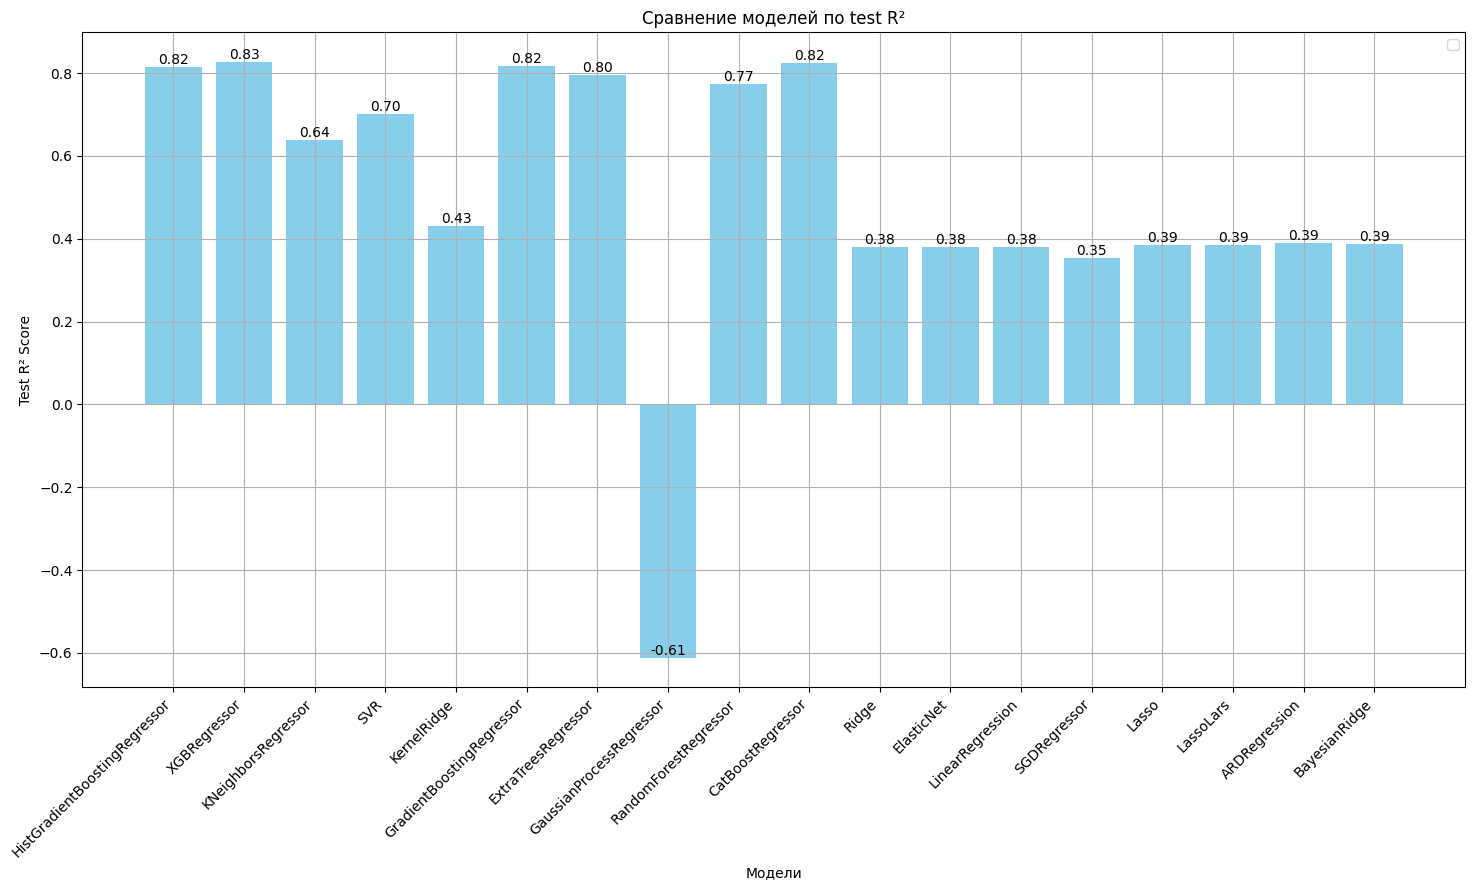

In [4]:
# Построить график тестовой оценки R2 для лучших моделей
model_names = [f'{type(model).__name__}'for model in OS.best_models]
test_r2_scores = OS.best_models_r_test
val_r2_scores = OS.best_models_r_val

plt.figure(figsize=(15, 9))

plt.grid()
tbars = plt.bar(model_names, test_r2_scores, color='skyblue')
plt.title('Сравнение моделей по test R²')
plt.xlabel('Модели')
plt.ylabel('Test R² Score')
plt.legend()
plt.xticks(rotation=45, ha='right')
for tbar, tscore in zip(tbars, test_r2_scores):
    plt.text(tbar.get_x() + tbar.get_width() / 2, tbar.get_height(), 
             f'{tscore:.2f}', ha='center', va='bottom')
plt.tight_layout()

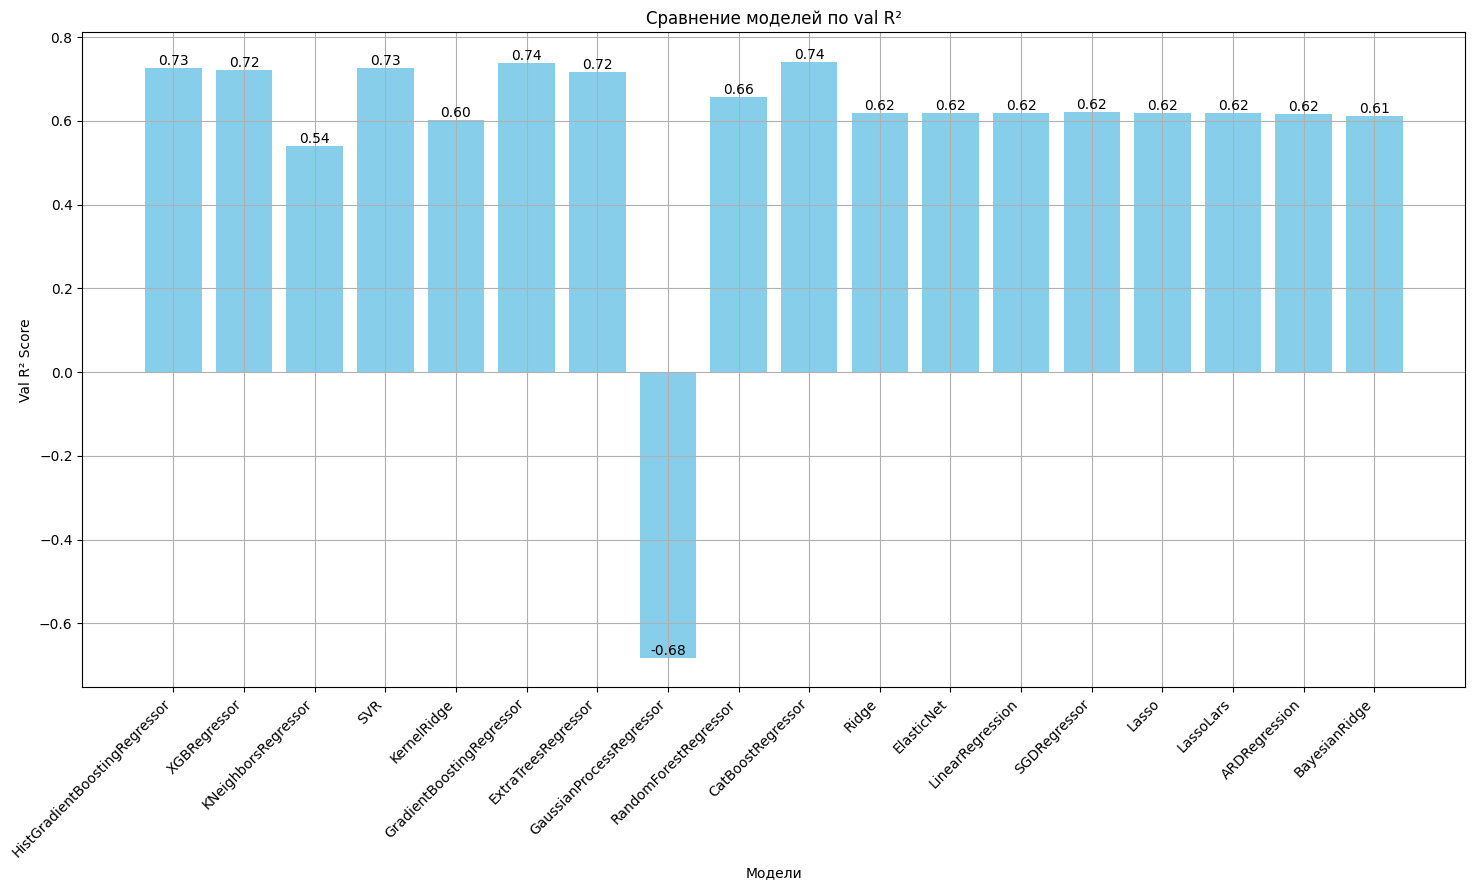

In [5]:
# Построить график валидационной оценки R2 для лучших моделей
plt.figure(figsize=(15, 9))

plt.grid()
bars = plt.bar(model_names, val_r2_scores, color='skyblue')
plt.title('Сравнение моделей по val R²')
plt.xlabel('Модели')
plt.ylabel('Val R² Score')
plt.xticks(rotation=45, ha='right')
for bar, score in zip(bars, val_r2_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{score:.2f}', ha='center', va='bottom')
plt.tight_layout()

In [20]:
# Выбрать модель для симуляции
scores = OS.best_models_r_val

r2_max = -99

for i, test_r2_score in enumerate(scores):
    if r2_max < test_r2_score:
        r2_max = test_r2_score
        ii = i

model_to_simulate = OS.best_models[ii]
print(type(model_to_simulate).__name__)
print(r2_max)

CatBoostRegressor
0.8287021125979965


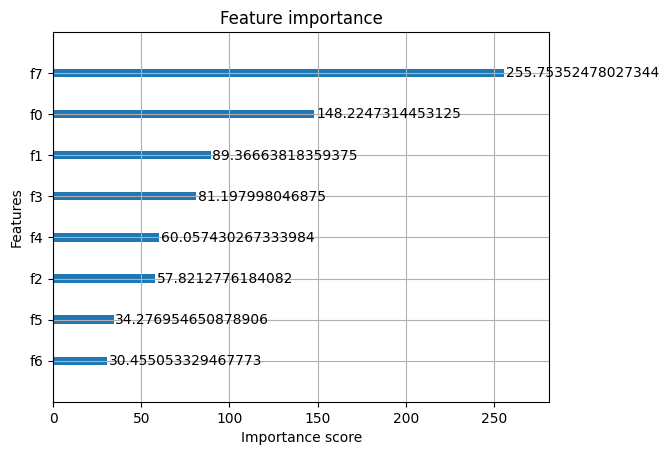

In [12]:
# Построить гистограмму важности фич
model = OS.best_models[1]
plot_importance(model, importance_type='gain')
plt.show()

In [ ]:
# Ручной выбор модели
model_to_simulate = OS.best_models[2]

In [21]:
# Отобразить все результаты
df = pd.read_csv('../results/cement_results.csv')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
	display(df.sort_values(by=['R2_test'], ascending=False))

,Unnamed: 0,n,CV_mode,Model,R2_val,R2_test,Parameters,object
463,463,13,loo,CatBoostRegressor,7.934939e-01,8.481045e-01,"{'learning_rate': 0.22853540257217342, 'depth'...",NaN
492,492,42,loo,CatBoostRegressor,7.849897e-01,8.469191e-01,"{'learning_rate': 0.13428146583824305, 'depth'...",NaN
3,3,3,loo,HistGradientBoostingRegressor,7.496514e-01,8.460158e-01,"{'learning_rate': 0.027475480541761077, 'max_d...",NaN
486,486,36,loo,CatBoostRegressor,8.106281e-01,8.458822e-01,"{'learning_rate': 0.4176656394613241, 'depth':...",NaN
92,92,42,loo,XGBRegressor,7.665972e-01,8.458579e-01,"{'learning_rate': 0.1047221016210266, 'max_dep...",NaN
52,52,2,loo,XGBRegressor,7.508854e-01,8.456254e-01,"{'learning_rate': 0.15692464729825076, 'max_de...",NaN
487,487,37,loo,CatBoostRegressor,7.743114e-01,8.455140e-01,"{'learning_rate': 0.2638271606528609, 'depth':...",NaN
485,485,35,loo,CatBoostRegressor,7.717393e-01,8.453016e-01,"{'learning_rate': 0.07614368976841442, 'depth'...",NaN
452,452,2,loo,CatBoostRegressor,7.325769e-01,8.446878e-01,"{'learning_rate': 0.2140559211236537, 'depth':...",NaN
80,80,30,loo,XGBRegressor,7.458637e-01,8.445233e-01,"{'learning_rate': 0.08759358037048261, 'max_de...",NaN


In [ ]:
# Оптимизация над аппроксимируемой функцией
OS.optimize(OS.best_models, scaler, direction='minimize', problem='synth', plot=False, verbose=True)

In [15]:
# Симуляция эксперимента
def func(x):
	return np.sin(x.T[0])+np.sin(x.T[0]/2)+np.sin(x.T[0]/4)+np.cos(x.T[0]/8)+np.cos(x.T[0]/16)

min_y_row = full_df.loc[full_df['y'].idxmin()]
x_min = float(min_y_row[['x1']])
y_min = min_y_row['y']
tol = 0.5
n_trials = 150
n_startup_trials = 10
max_iter = 20

accuracy_history, min_history, x_history, y_history,y_true_history = OS.simulate_experiment(func, model_to_simulate, scaler, x_train_scaled, y_train, x_min, y_min, tol, direction='minimize', n_trials=n_trials, n_startup_trials=n_startup_trials, max_iter=max_iter)

In [13]:
print(x_min)

73.31129560905445


In [16]:
x_np = np.array(x_history)[:,0]
print(x_np)

[66.30101431 22.4654817  22.11423633 69.80116666 72.00707056 23.52840336
 21.39024666 23.46816586 72.98159442]


In [10]:
for i, yi in enumerate(y_history):
	print(f'{i} {yi}')

0 -2.6334906547374226
1 -3.027121111250994
2 -2.534735332933262
3 -2.904792354342898
4 -2.376314901167352
5 -3.0177454107486135
6 -2.4227806924211412
7 -2.2708047581485054


In [ ]:
# Построить график вектора x от номера шага
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(x_np) + 1), x_np, marker='o', linestyle='-')

plt.xlabel('Номер шага')
plt.ylabel('x')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Построить график |y_pred-y_true| от номера шага

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracy_history) + 1), accuracy_history, marker='o', linestyle='-')

plt.xlabel('Номер шага')
plt.ylabel('|y_pred-y_true|')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Построить график |y_pred-global_min(y_true)| от номера шага
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(min_history) + 1), min_history, marker='o', linestyle='-')

plt.xlabel('Номер шага')
plt.ylabel('|y_pred-global_min|')
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
numbers = [-6, -8, 0, 1, 3, 8, -7, 12, 17, 24, 25, 3, 5, 1]
res = 0
for num in numbers:
    res += (num % 2 == 1) and (num > 1) 
print(res)

5


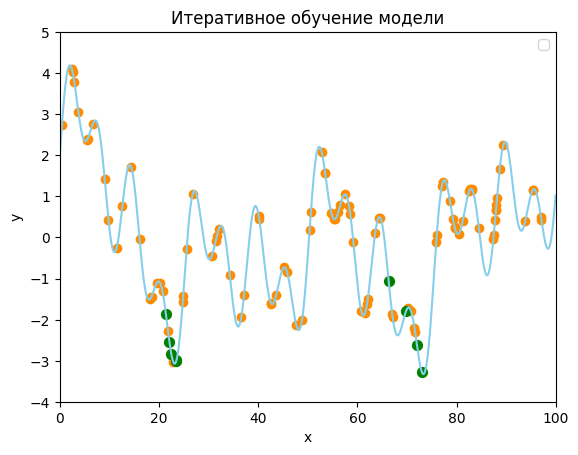

In [18]:
# Создать анимацию истории выбора точек
from copy import deepcopy
from matplotlib.animation import FuncAnimation

_x_train = deepcopy(x_train)
_y_train = deepcopy(y_train)

frames = []
frames.append((x_train, y_train))
l = len(x_train)

i=0
for x_new, y_new in zip(x_history, y_true_history):
    i+=1
    _x_train = np.vstack([_x_train, x_new])
    _y_train = np.append(_y_train, y_new)

    frames.append((_x_train, _y_train))

fig, ax = plt.subplots()
line, = ax.plot([], [], 'b-')
plt.scatter(x_train.T[0], y_train, color='darkorange')
scatter_new = ax.scatter([], [], c='green', s=50)
ax.plot(x_full.T[0], y_full, c='skyblue')

def update(frame):
    global line
    X_tr, y_tr = frame
    npc = np.c_[X_tr[l:,0], y_tr[l:]]
    line = line
    scatter_new.set_offsets(npc)
    ax.set_xlim(0, 100)
    ax.set_ylim(-4, 5)
    return line, scatter_new

ani = FuncAnimation(fig, update, frames=frames, interval=500, blit=True)
ani.save("animated.gif", writer='pillow')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Итеративное обучение модели")
plt.show()